In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib as mpl

In [326]:
df_salary_dataset = pd.read_csv('salary_dataset.csv')

In [327]:
df_salary = df_salary_dataset.iloc[:, 1:]
df_salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


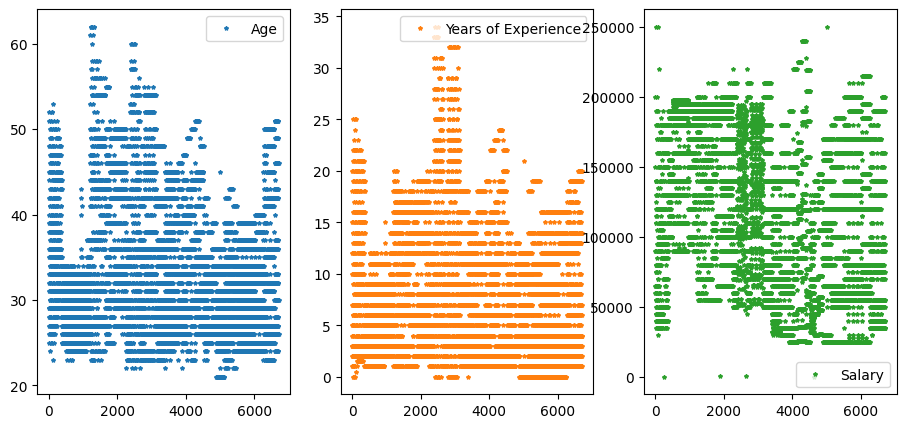

In [328]:
df_salary.plot(lw=0, marker="*", subplots=True, layout=(1, 4),
          figsize=(15, 5), markersize=3)
plt.show()

Возраст и стаж данные дискретные, что не удивительно в принципе. А зарплата по идее должна относится к непрерывным величинам, но из графика скорее следует что зарплату округляли и получились тоже дискретные данные.

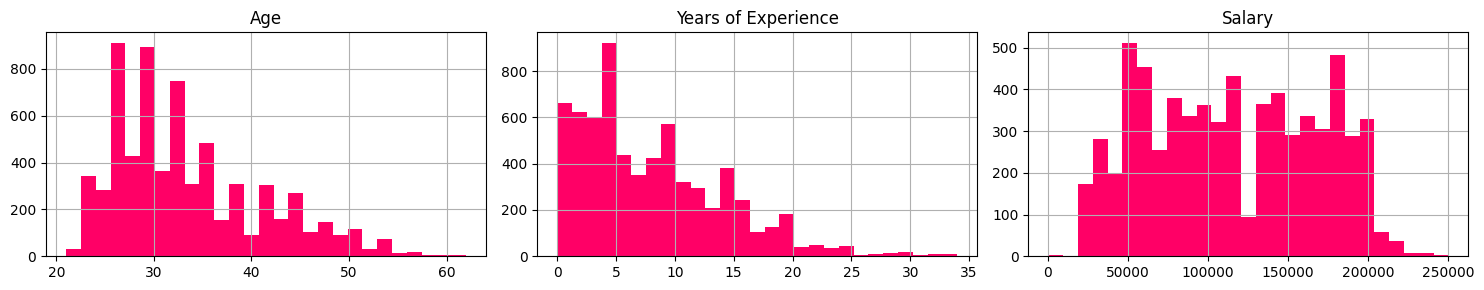

In [329]:
df_salary.hist(bins=27, figsize=(15, 3), layout=(1, 3), color='#ff0066')
plt.tight_layout()

У возраста и стажа распределение правостороннее, а зарплата имеет скорее характер мультимодального распределения.

In [330]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 419.1+ KB


In [331]:
df_salary.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Все цифры похожи на реальные, разброс по возрасту больше, чем разброс по опыту работы

<Axes: title={'center': 'Доля пропусков по каждому признаку'}, ylabel='Доля пропусков'>

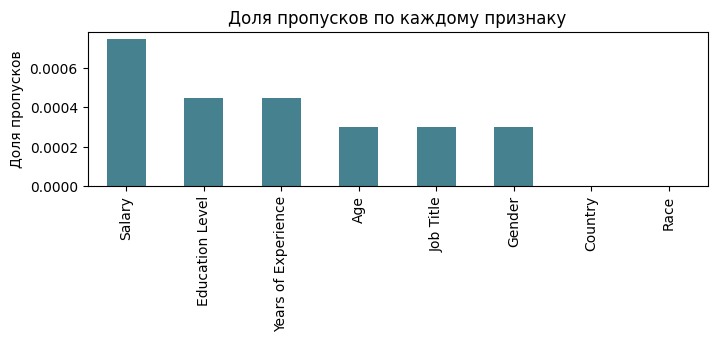

In [332]:
df_salary.isna().mean().sort_values(ascending=False).plot(
    kind="bar", figsize=(8, 2),
    title="Доля пропусков по каждому признаку",
    ylabel="Доля пропусков",
    color = "#45818e")

<Axes: title={'center': 'Количество пропусков по каждому признаку'}, ylabel='Число пропусков'>

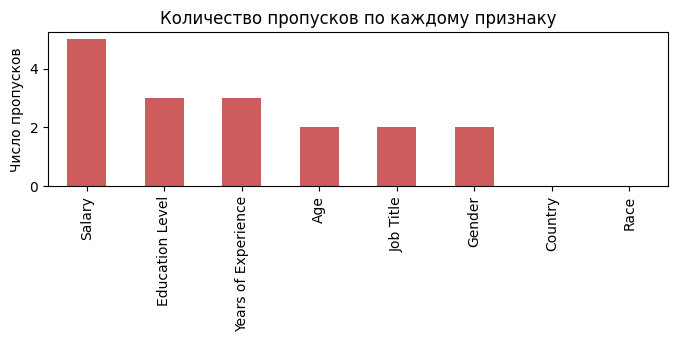

In [333]:
df_salary.isna().sum().sort_values(ascending=False).plot(
    kind="bar", figsize=(8, 2),
    title="Количество пропусков по каждому признаку",
    ylabel="Число пропусков",
    color='#cd5c5c')

Пропущенных значений очень мало в % отношении, в принципе можно было бы их убрать, но мы копнем глубже.

In [334]:
df_salary.shape

(6704, 8)

Можно в принципе вот так сделать

In [335]:
df_salary = df_salary.dropna(thresh=df_salary.shape[1]*0.9, axis=0)
df_salary.shape

(6698, 8)

Gender                 0.548074
Education Level        0.338161
Race                   0.292923
Country                0.202896
Years of Experience    0.091072
dtype: float64

<Axes: >

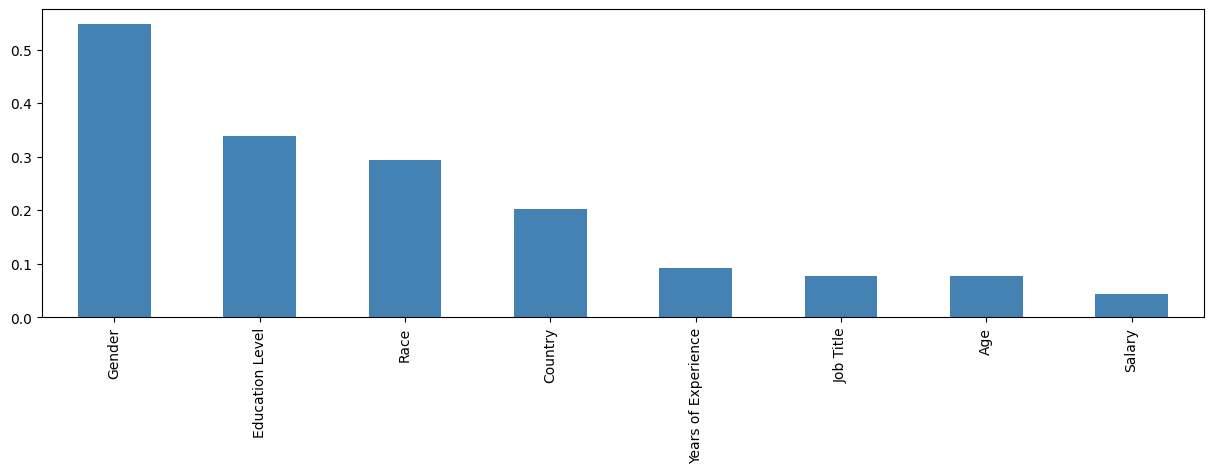

In [336]:
most_frequent_entry = df_salary.mode()

df_freq = df_salary.eq(most_frequent_entry.values, axis=1)

df_freq = df_freq.mean().sort_values(ascending=False)

display(df_freq.head())

df_freq.plot.bar(figsize=(15, 4), color='#4582B4')

Ну с гендером все понятно, либо мальчик либо девочка, хотя бывают и исключения. Уровень образования тоже неудивительно, что имеет моду, которая охватывает более 30% респондентов. Такая же ситуация с расой и страной (около 20%). Ничего необычного.....

Посмотрим на корреляции

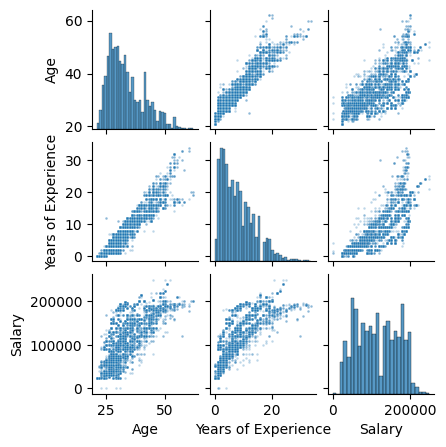

In [337]:
sns.pairplot(df_salary, height=1.5, plot_kws={"s": 3, "alpha": 0.3})

In [338]:
df_salary.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race'],
      dtype='object')

Ну тоже ничего необычного, возраст корреллирует с опытом, опыт и возраст с зарплатой правда корреляция не совсем линейная

In [339]:
df_salary['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [340]:
df_salary.loc[:, 'Education Level'] = df_salary.apply(lambda row: str(row['Education Level'])\
                                   .replace("Bachelor's Degree", "Bachelor's")\
                                   .replace("Master's Degree",  "Master's")\
                                   .replace("phD", "PhD"), axis=1)

In [341]:
df_salary['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [342]:
df_salary.Race.unique()

array(['White', 'Hispanic', 'Asian', 'Korean', 'Chinese', 'Australian',
       'Welsh', 'African American', 'Mixed', 'Black'], dtype=object)

In [343]:
df_salary.loc[:, 'Race'] = df_salary.apply(lambda row: str(row['Race'])\
                                   .replace("Korean", "Asian")\
                                   .replace("Chinese",  "Asian")\
                                   .replace("African American",  "Black")\
                                   .replace("Welsh",  "White")\
                                   .replace("Australian",  "White"), axis=1)        

In [344]:
df_salary.Race.unique()

array(['White', 'Hispanic', 'Asian', 'Black', 'Mixed'], dtype=object)

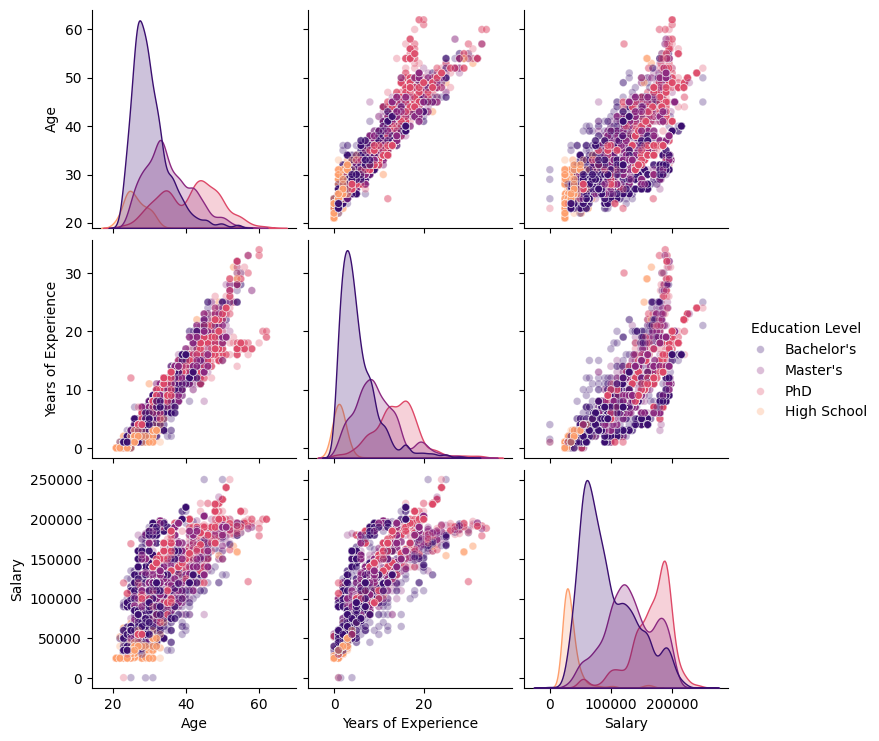

In [345]:
sns.pairplot(
    df_salary, plot_kws={"s": 30, "alpha": 0.3}, hue="Education Level", palette="magma")

<Axes: xlabel='Salary'>

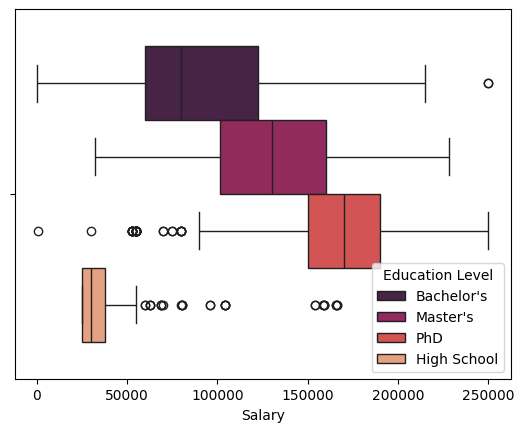

In [346]:
sns.boxplot(data = df_salary, x = 'Salary', hue = 'Education Level', palette='rocket')

Ну тоже все логично, доктора наук зарабатывают больше, чем люди, окончившие только школу. Докторами наук не рождаются ими становятся.....
Много бакалавров без опыта работы или с небольшим стажем. Есть преданные науке доктора, которые видимо работают за идею....... А есть прорывные товарищи без образования, которые, вероятно, обладают востребованными навыками.

In [347]:
df_salary.Race.unique()

array(['White', 'Hispanic', 'Asian', 'Black', 'Mixed'], dtype=object)

In [348]:
df_salary.groupby('Race', as_index=False)\
    .agg({'Salary': {'min', 'mean', 'max'}, 
          'Age': {'min', 'mean', 'max'},
          'Years of Experience': {'min', 'mean', 'max', 'count'}})

Race   Salary                            Age                   \
                 min           mean       max   min       mean   max   
0     Asian    500.0  114892.037141  250000.0  21.0  33.420927  62.0   
1     Black  25000.0  115740.769912  250000.0  21.0  33.855879  58.0   
2  Hispanic    350.0  110410.139752  225000.0  22.0  32.760870  61.0   
3     Mixed    550.0  116330.859281  220000.0  23.0  33.703593  62.0   
4     White  25000.0  116064.126320  240000.0  21.0  33.831452  62.0   

  Years of Experience                        
                  min      mean   max count  
0                 0.0  7.965056  34.0  2504  
1                 0.0  8.267383  33.0   791  
2                 0.0  7.456522  26.0   322  
3                 0.0  8.161677  33.0   334  
4                 0.0  8.230979  33.0  2747

<Axes: xlabel='Salary'>

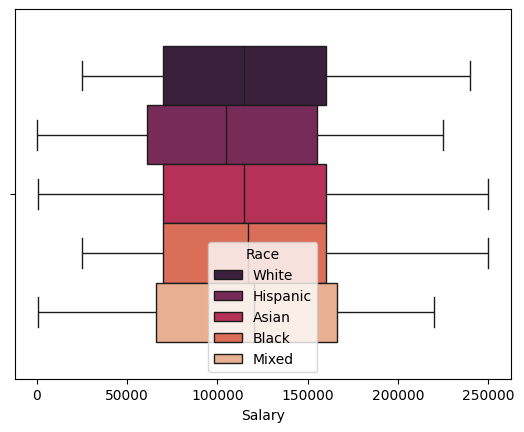

In [349]:
sns.boxplot(data = df_salary, x = 'Salary', hue = 'Race', palette='rocket')

Интересно, чем Афроамериканцы отличаются от черных..... Вообще зря они так с испанцами, нормальные ребята.

In [350]:
df_salary.Country.unique()

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

<Axes: xlabel='Salary'>

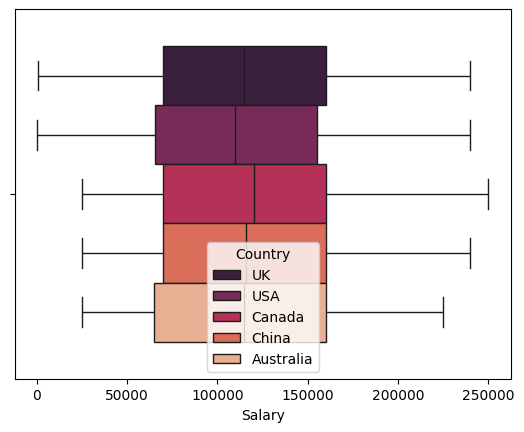

In [351]:
sns.boxplot(data = df_salary, x = 'Salary', hue = 'Country', palette='rocket')

Вообщем нормально все живут, но оказывается что низкооплачиваемая работа ниже оплачивается в USA и UK а не в Китае....... Хотя по ходу там много волонтеров ...... или альтруистов....

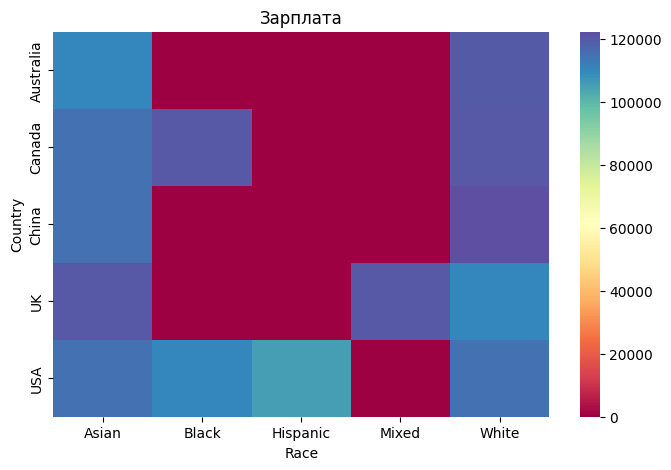

In [436]:
race_country = pd.pivot_table(data=df_salary, index='Country', columns='Race', values='Salary', aggfunc='median').fillna(0)

plt.figure(figsize=[8,5])
sns.heatmap(race_country, cmap='Spectral')
plt.title("Зарплата")
plt.show()

Афроамериканцам (политкорректно чтобы) больше платят в Канаде, а белым в Китае.... А в USA и UK белым меньше платят... Азиатам хорошо платят в UK. А что корейцы не азиаты...... Вообще расы всего 4, а так как австралийские аборегены почти вымерли, то их только 3...... Начнем анализ сначала)))

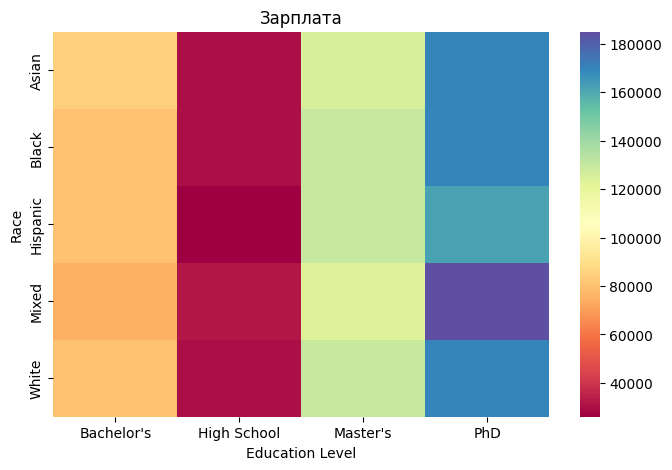

In [ ]:
race_education = pd.pivot_table(data=df_salary, index='Race', columns='Education Level', values='Salary', aggfunc='median').fillna(0)

plt.figure(figsize=[8,5])
sns.heatmap(race_education, cmap='Spectral')
plt.title("Зарплата")
plt.show()

Mixed (Метисы, мулаты, креолы, самбо, мальгаши - не поленилась залезла в Википедию) доктора наук самый высокооплачиваемый вид людей)))

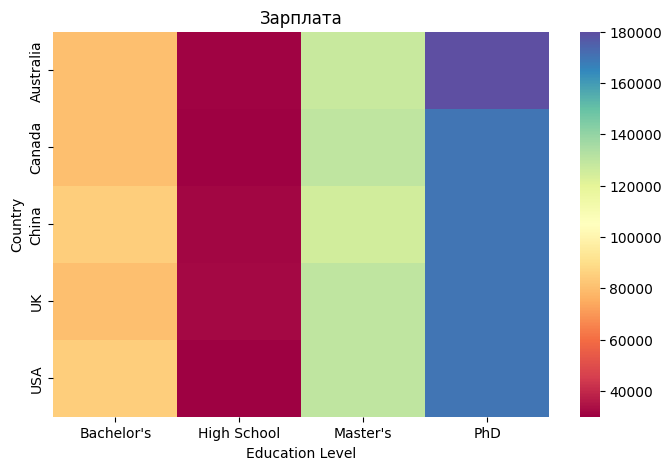

In [ ]:
country_education = pd.pivot_table(data=df_salary, index='Country', columns='Education Level', values='Salary', aggfunc='median').fillna(0)

plt.figure(figsize=[8,5])
sns.heatmap(country_education, cmap='Spectral')
plt.title("Зарплата")
plt.show()

Ну чем выше образование, тем больше зп - все логично.... Так везде....Но в Австралии особенно хорошо получают Доктора Наук

Gender Job Title

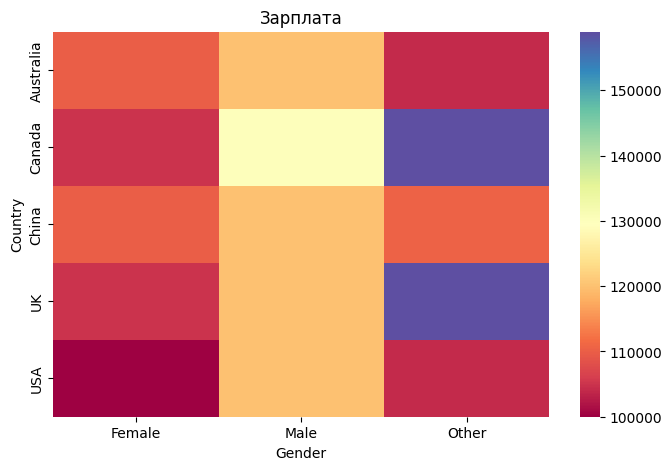

In [ ]:
gender_country = pd.pivot_table(data=df_salary, index='Country', columns='Gender', values='Salary', aggfunc='median').fillna(0)

plt.figure(figsize=[8,5])
sns.heatmap(gender_country, cmap='Spectral')
plt.title("Зарплата")
plt.show()

Половая дискриминация!!!!!!!!! Караул!!!!

In [394]:
job_title_group = df_salary\
    .groupby('Job Title', as_index=False)\
        .agg({'Age': 'count'})\
        .rename(columns={'Age': 'count_of'})\
        .sort_values(by='count_of', ascending=False)
print(job_title_group.count_of.quantile(0.9))
job_title_group_high = job_title_group\
    .query('count_of>87')
job_high_salary = list(job_title_group_high['Job Title'].unique())

87.0


In [435]:
job_title_group = df_salary\
    .groupby('Job Title', as_index=False)\
        .agg({'Age': 'count'})\
        .rename(columns={'Age': 'count_of'})\
        .sort_values(by='count_of', ascending=False)
print(job_title_group.count_of.quantile(0.42))
job_title_group_lower = job_title_group\
    .query('count_of<=1')
print(f'Количество названий должностей, на которых самые низкие зп {int(job_title_group_lower['Job Title'].count())}')

1.0
Количество названий должностей, на которых самые низкие зп 81


Много слишком, график будет неинформативным по названиям должностей, на которых самые низкие зарплаты

In [395]:
df_salary_high = df_salary[df_salary['Job Title'].isin(job_high_salary)]

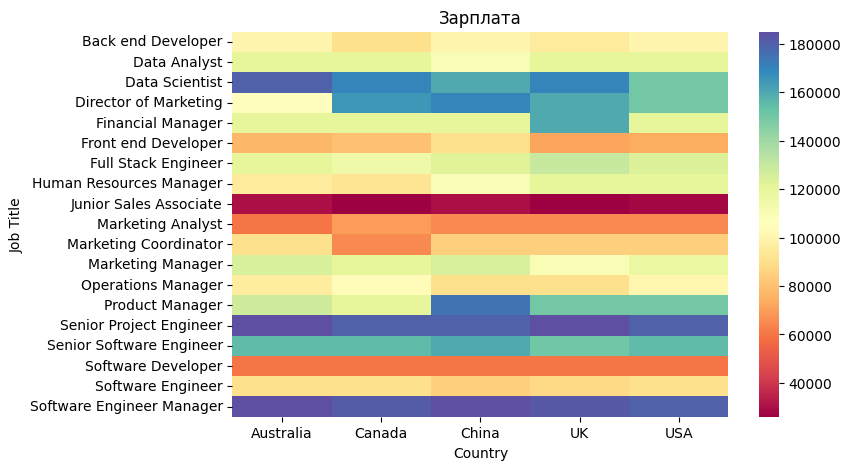

In [ ]:
job_country_high = pd.pivot_table(data=df_salary_high, index='Job Title', columns='Country', values='Salary', aggfunc='median').fillna(0)

plt.figure(figsize=[8,5])
sns.heatmap(job_country_high, cmap='Spectral')
plt.title("Зарплата")
plt.show()

Уже знаю на какой следующий курс я пойду учиться в неотологии))) Инженер (даже не важно чего.....) 
Или пошью костюм с отливом и в Австралию

Жалко Russia не было в анализе для сравнения, ну это наверное, чтобы не расстраиваться)))

In [440]:
df_salary_dataset[pd.isnull(df_salary_dataset).any(axis=1)]

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
2011,2011,27.0,Male,NaN,Developer,7.0,100000.0,UK,White
3136,3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN,Canada,White
5247,5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,USA,White
6455,6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN,Canada,White


In [441]:
df_salary_dataset[df_salary_dataset['Job Title']=='Developer']

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
2011,2011,27.0,Male,NaN,Developer,7.0,100000.0,UK,White


Так как мы анализ в основном проводим по зп, то не имеет смысла заполнять эти пропуски на мой взгляд. Developer можно было бы заполнить образование.
Но Developer 1, поэтому думаю не имеет особого смысла.....